In [1]:
from bmtk.builder.networks import NetworkBuilder
from bmtk.utils.sim_setup import build_env_bionet
import json
from edit_genome import process_json
from bmtk.simulator import bionet
from bmtk.analyzer.spike_trains import to_dataframe
from bmtk.analyzer.cell_vars import plot_report
import os
import shutil
%matplotlib inline

In [2]:
net = NetworkBuilder('BL')
net.add_nodes(cell_name='BL',
          potental='exc',
          model_type='biophysical',
          model_template='ctdb:Biophys1.hoc',
          model_processing='aibs_perisomatic',
          dynamics_params='fit_parameters.json',
          morphology='reconstruction.swc')
#shutil.rmtree('./network')
net.build()
net.save_nodes(output_dir='network')

In [3]:
build_env_bionet(network_dir='network', tstop=2000.0, dt=0.1,
                     reports={'membrane_report': {
                             "module": "membrane_report",
                             'cells': 'all',
                             'variable_name': ['v'],
                             "file_name": "BL_nodes.h5",
                             "sections": "soma",
                         }})
    
shutil.copy('sources/fit_parameters.json','biophys_components/biophysical_neuron_templates/')
shutil.copy('sources/reconstruction.swc','biophys_components/morphologies/')
shutil.rmtree('biophys_components/mechanisms/')
shutil.copytree('sources/modfiles','biophys_components/mechanisms/modfiles')
shutil.copytree('sources/x86_64','biophys_components/mechanisms/x86_64')

/home/mizzou/Desktop/BMTK/biophys_components/mechanisms


'biophys_components/mechanisms/x86_64'

In [4]:
with open("./simulation_config.json",'r') as load_f:
        load_dict = json.load(load_f)
        #print(load_dict)
        load_dict['inputs'] =  {"current_clamp1": {
        "input_type": "current_clamp",
        "module": "IClamp",
        "node_set": "all",
        "amp": 0.30, #change value of injected current here
        "delay": 300.0, #change input delay time
        "duration": 500.0 #change input duration time
        }     
        }
with open("./simulation_config.json",'w') as dump_f:
    json.dump(load_dict,dump_f)

In [5]:
value_Nap = 1.0e-6   #change Nap value here, default value is 4.8370889303706033e-07
value_K_P = 0.0001   #change K_P here, default value is 0.044654807621449702
value_Im = 0.0003   #change Km here, default value is 0.00020767501587716232

In [6]:
#you can change any conductance name and value here
process_json('./biophys_components/biophysical_neuron_templates/fit_parameters.json','Nap',value_Nap)  
process_json('./biophys_components/biophysical_neuron_templates/fit_parameters.json','K_P',value_K_P)
process_json('./biophys_components/biophysical_neuron_templates/fit_parameters.json','Im',value_Im)

In [7]:
conf = bionet.Config.from_json('simulation_config.json')
conf.build_env()
net = bionet.BioNetwork.from_config(conf)
sim = bionet.BioSimulator.from_config(conf, network=net)
sim.run()


2019-09-08 22:25:57,760 [INFO] Created log file
2019-09-08 22:25:57,884 [INFO] Building cells.
2019-09-08 22:25:58,279 [INFO] Building recurrent connections
2019-09-08 22:25:58,294 [INFO] Running simulation for 2000.000 ms with the time step 0.100 ms
2019-09-08 22:25:58,296 [INFO] Starting timestep: 0 at t_sim: 0.000 ms
2019-09-08 22:25:58,297 [INFO] Block save every 5000 steps
2019-09-08 22:25:58,487 [INFO]     step:5000 t_sim:500.00 ms
2019-09-08 22:25:58,678 [INFO]     step:10000 t_sim:1000.00 ms
2019-09-08 22:25:58,856 [INFO]     step:15000 t_sim:1500.00 ms
2019-09-08 22:25:59,036 [INFO]     step:20000 t_sim:2000.00 ms
2019-09-08 22:25:59,044 [INFO] Simulation completed in 0.75 seconds 


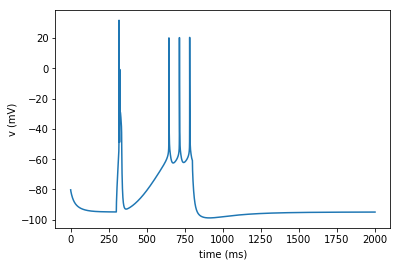

In [8]:
plot_report(config_file='simulation_config.json')